In [1]:
%matplotlib inline
import os
import sys
sys.path.append("../")
from dataloaders import AudioDataset
from glob import glob
import librosa
import librosa.display
import IPython.display as ipd
import torch
import matplotlib.pyplot as plt
import time
import sklearn
import numpy as np
DEVICE='cpu'

In [2]:
def show_spectrogram2(*args, **kwargs):
    plt.figure(figsize=(15, 5))
    librosa.display.specshow(*args, **kwargs)
def show_image(image):
    fig = plt.figure()
    plt.imshow(image)
def play_audio(*args, **kwargs):
    return ipd.Audio(*args, **kwargs)

In [3]:
# SAMPLES_PATH = "/Users/test/Documents/Projects/Master/birds-generation/generated.out"
# SAMPLES_PATH = "/Users/test/Documents/Projects/Master/birds-generation/future_artifacts/2020-10-05/11-11-18/samples/9999.tmp"
SAMPLES_PATH = "/Users/test/Downloads/conditioned-out-0.pngtop-bottom.pt"
SR = 16384

In [6]:
generated_out = torch.load(SAMPLES_PATH, map_location=DEVICE)
generated_out = torch.tanh(generated_out)
generated_out =  generated_out.detach().squeeze(1).numpy()
generated_out.shape

(10, 128, 128)

Elapsed time 1.1920928955078125e-06
Elapsed time 9.5367431640625e-07
Elapsed time 1.1920928955078125e-06
Elapsed time 1.9073486328125e-06
Elapsed time 1.1920928955078125e-06
Elapsed time 9.5367431640625e-07
Elapsed time 2.1457672119140625e-06
Elapsed time 0.0
Elapsed time 3.0994415283203125e-06
Elapsed time 9.5367431640625e-07


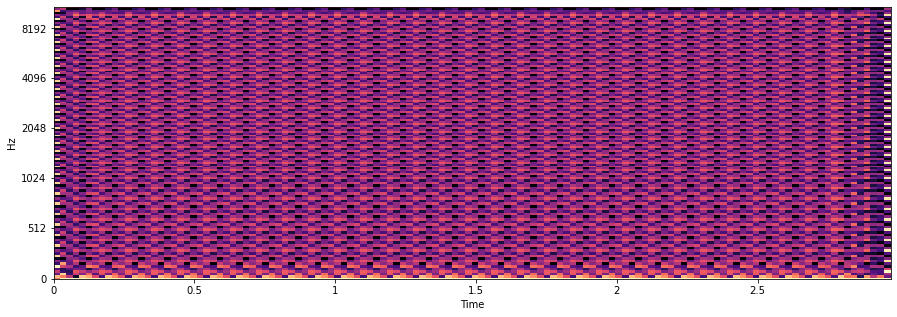

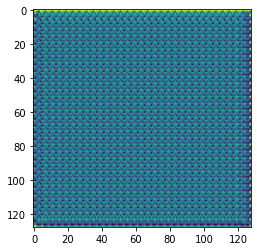

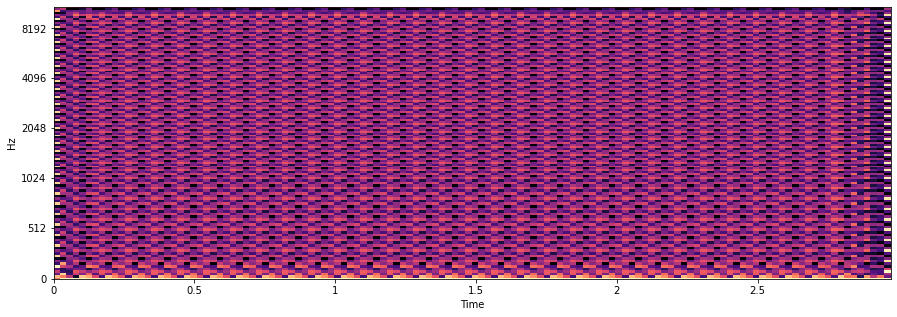

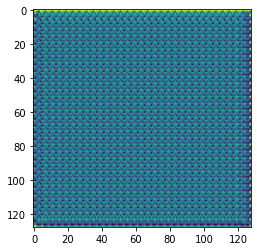

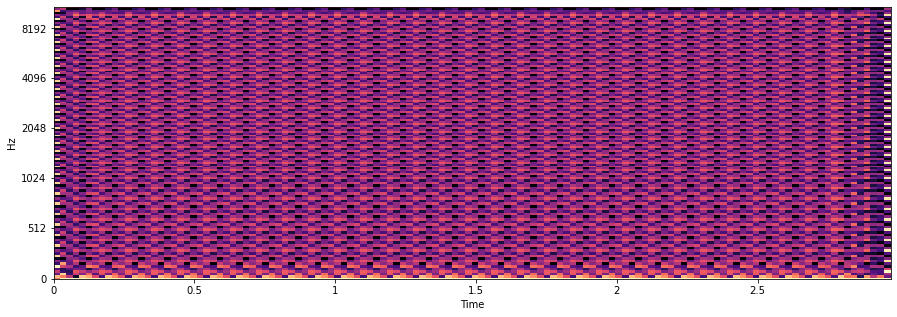

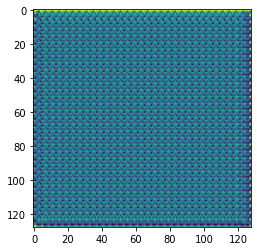

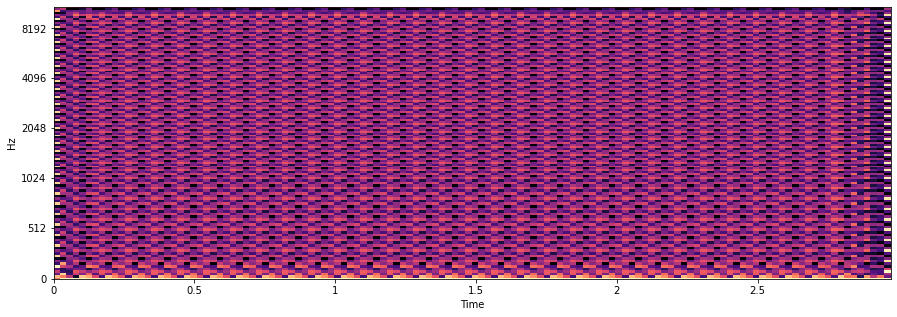

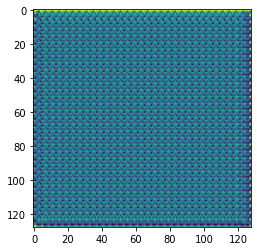

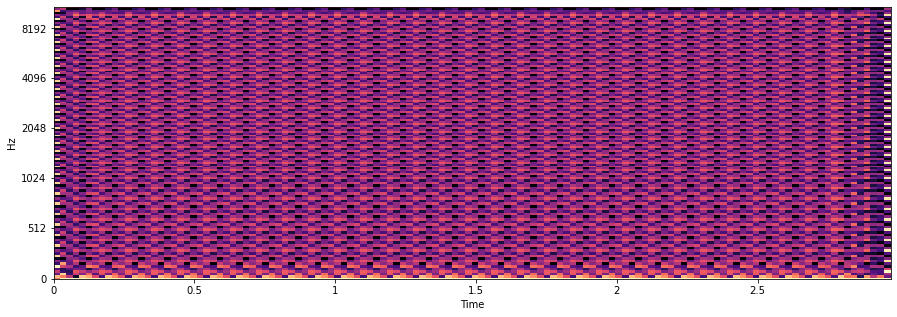

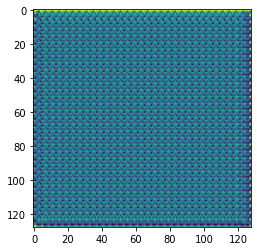

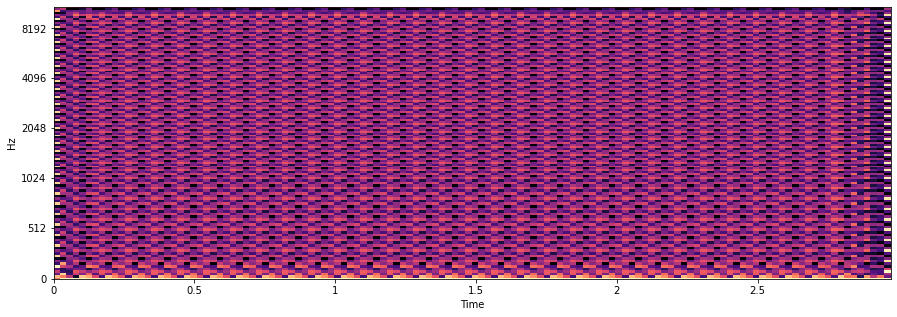

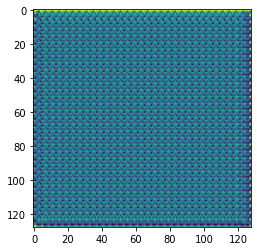

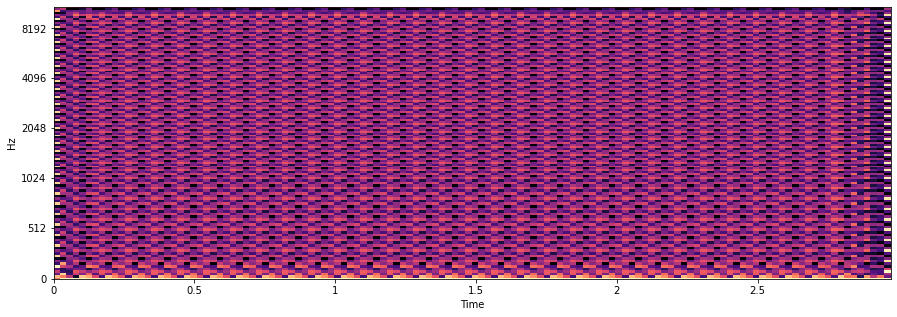

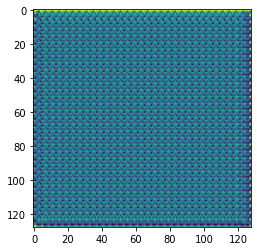

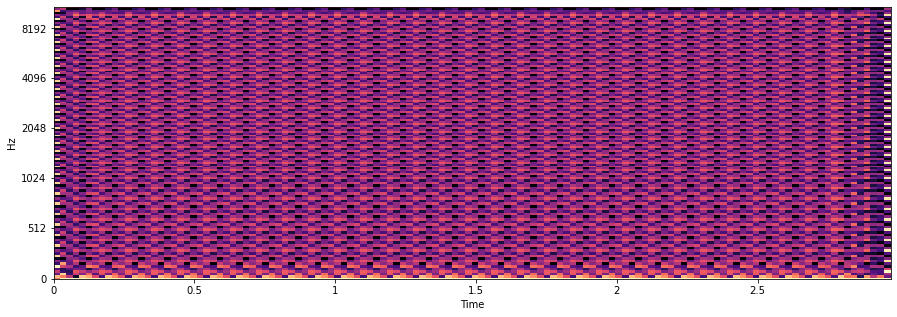

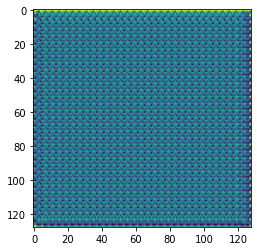

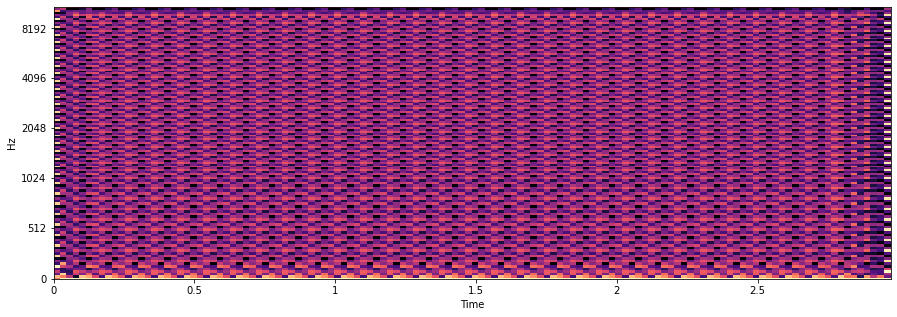

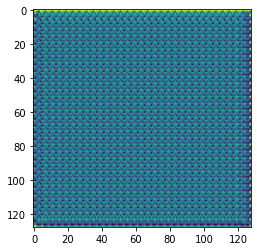

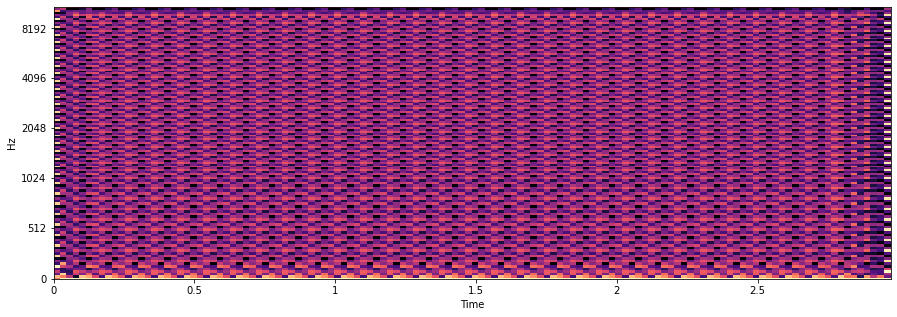

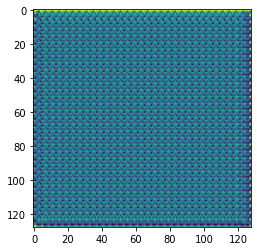

In [10]:
audios = []
for sample in generated_out:
    sample = sklearn.preprocessing.MinMaxScaler(feature_range=(0,256.0)).fit_transform(sample)
    show_spectrogram2(sample, x_axis='time', y_axis='mel')
    show_image(sample)
    start_t = time.time()
    # audios.append(AudioDataset.mel_spectrogram_to_audio(sample, resize=False))
    print("Elapsed time", time.time() - start_t)

In [6]:
for i in range(len(audios)):
    outfile = f"{i}-outs.wav" if "outs" in SAMPLES_PATH else f"{i}.wav"
    librosa.output.write_wav(outfile, audios[i], sr=SR)
play_audio(audios[0], rate=SR)

In [7]:
play_audio(audios[1], rate=SR)

In [8]:
len(audios[0])

32256

In [9]:
len(audios[1])

32256